In [1]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams["figure.figsize"] = (8, 8)
sns.set_theme()
sns.set_context("talk")

# A second partitionning-based algorithm: Gaussian Mixture Models

## Outline

- Recap of Kmeans and limitations
- Derivation of GMM in 1D
- Implementation in scikit-learn
- Parameter selection

## Kmeans: recap and limitations

### Recap
On a simple 1D example, present how the Kmeans algorithm works
- Training
- Inference

### Exercise

Build a 2D toy example containing 2 natural clusters (coming from two multi-variate Gaussian distributions). The clusters should have different scale (one very dense and one more spread out). Each cluster contains 500 points.

_Use the code from the Agglomerative clustering slides as a starting point_.

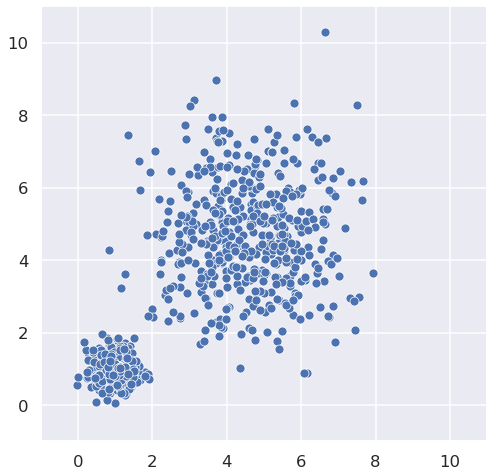

In [3]:
means = [np.array([1, 1]), np.array([4.5, 4.5])]
covariance = [np.array([[0.1, 0], [0, 0.1]]), np.array([[2, 0], [0, 2]])]
n_points = 500

data = [np.random.multivariate_normal(mean=means[i], cov=covariance[i], size=n_points) for i in range(2)]
data = np.r_[data[0], data[1]]

sns.scatterplot(x=data[:, 0], y=data[:,1])
plt.axis([-1, 11, -1, 11])
plt.show()

### Exercise

- Build a 2D toy example containing 2 natural clusters (coming from two multi-variate gaussian distributions). The clusters should have different scale (one very dense and one more spread out). Each cluster contains 500 points.

- __Try to cluster these points using Kmeans? What do you observe?__

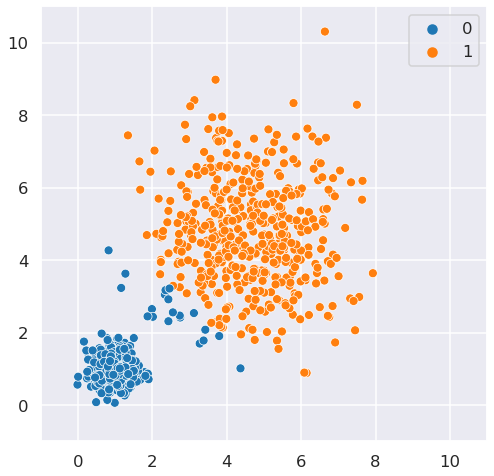

In [4]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2)
clusters = km.fit_predict(data)

sns.scatterplot(x=data[:, 0], y=data[:,1], hue=clusters, palette="tab10")
plt.axis([-1, 11, -1, 11])
plt.show()

### Exercise

- Build a 2D toy example containing 2 natural clusters (coming from two multi-variate gaussian distributions). The clusters should have different scale (one very dense and one more spread out). Each cluster contains 500 points.

- Try to cluster these points using Kmeans? What do you observe?

- __Can we solve the problem by normalizing the data?__

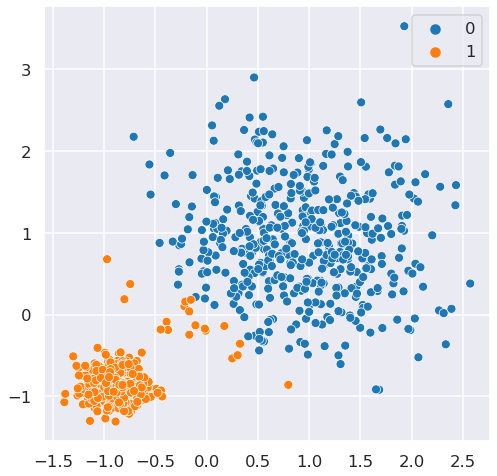

In [5]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
data_scaled = ss.fit_transform(data)

km = KMeans(n_clusters=2)
clusters = km.fit_predict(data_scaled)

sns.scatterplot(x=data_scaled[:, 0], y=data_scaled[:,1], hue=clusters, palette="tab10")
plt.show()

## Gaussian Mixture Models

Derivation on a 1D example

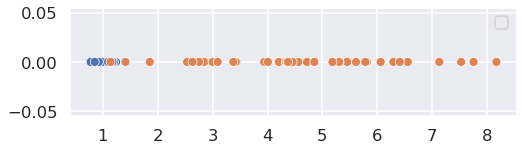

In [6]:
means = [1, 4.5]
scale = [0.1, 1.5]
n_points = 50

data1D = [np.random.normal(loc=means[i], scale=scale[i], size=n_points) for i in range(2)]
data1D = np.r_[data1D[0], data1D[1]]
labels = [0]*n_points + [1]*n_points

plt.figure(figsize=(8, 2))
sns.scatterplot(x=data1D, y=[0]*data1D.shape[0], hue=labels)
plt.legend("")
plt.show()

Let's suppose we manage to find the true cluster centers (using KMeans for example). Then, the decision boundary is:

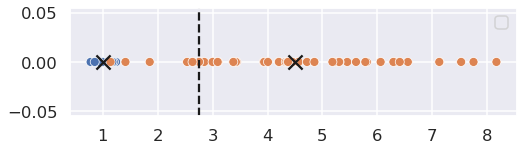

In [7]:
plt.figure(figsize=(8, 2))
sns.scatterplot(x=data1D, y=[0]*data1D.shape[0], hue=labels)

plt.scatter([1, 4.5], [0, 0], color='k', marker="x", s=200)
plt.axvline(x=2.75, color='k', linestyle='--')
plt.legend("")
plt.show()

Does not allow to properly cluster the points. 

Now if we also have access to the true variances of the distributions of the centers:

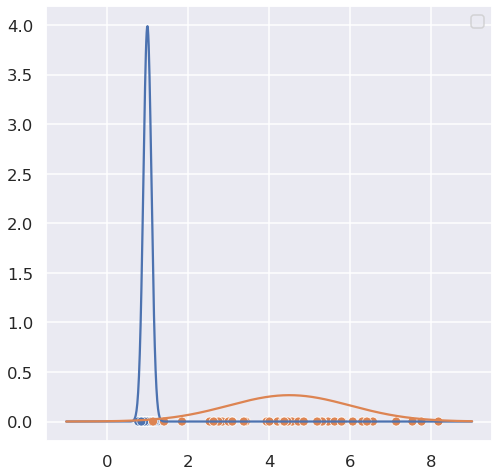

In [8]:
import scipy.stats as stats

sns.scatterplot(x=data1D, y=[0]*data1D.shape[0], hue=labels)

x = np.linspace(-1, 9, 1000)
plt.plot(x, stats.norm.pdf(x, means[0], scale[0]))
plt.plot(x, stats.norm.pdf(x, means[1], scale[1]))

plt.legend("")
plt.show()

### Question: In which cluster should we place the black point ?

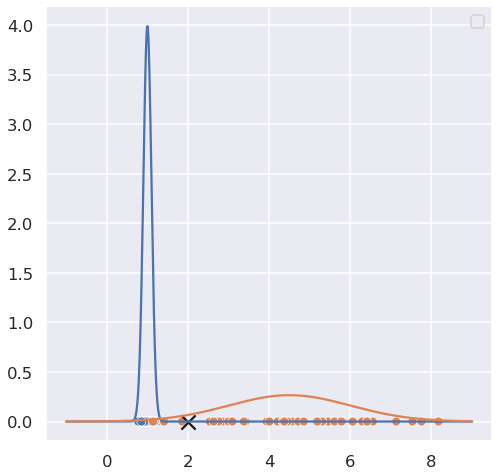

In [9]:
sns.scatterplot(x=data1D, y=[0]*data1D.shape[0], hue=labels)

x = np.linspace(-1, 9, 1000)
plt.plot(x, stats.norm.pdf(x, means[0], scale[0]))
plt.plot(x, stats.norm.pdf(x, means[1], scale[1]))

plt.scatter([2], [0], color="k", marker="x", s=200)

plt.legend("")
plt.show()

### Gaussian Mixture Model algorithm

- If we know the correct parameters of the clusters (mean and variance): we can correctly classify a point $x$ (cluster with maximum likelihood)
    - Likelihood: $p(x|C_k) = \frac{1}{\sqrt{2\pi\sigma_k^2}} \exp \left(\frac{||x - \mu_k||^2}{2\sigma_k^2}\right)$

### Question: In which cluster should we place the black point ?

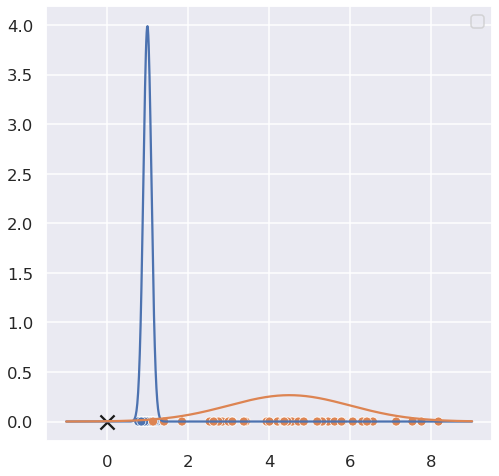

In [10]:
sns.scatterplot(x=data1D, y=[0]*data1D.shape[0], hue=labels)

x = np.linspace(-1, 9, 1000)
plt.plot(x, stats.norm.pdf(x, means[0], scale[0]))
plt.plot(x, stats.norm.pdf(x, means[1], scale[1]))

plt.scatter([0], [0], color="k", marker="x", s=200)

plt.legend("")
plt.show()

### Question: In which cluster should we place the black point ?

Let's zoom in!

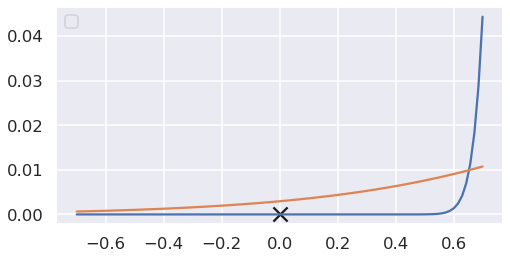

In [11]:
x = np.linspace(-0.7, 0.7, 100)

plt.figure(figsize=(8, 4))

plt.plot(x, stats.norm.pdf(x, means[0], scale[0]))
plt.plot(x, stats.norm.pdf(x, means[1], scale[1]))

plt.scatter([0], [0], color="k", marker="x", s=200)

plt.legend("")
plt.show()

### Question: In which cluster should we place the black point ?

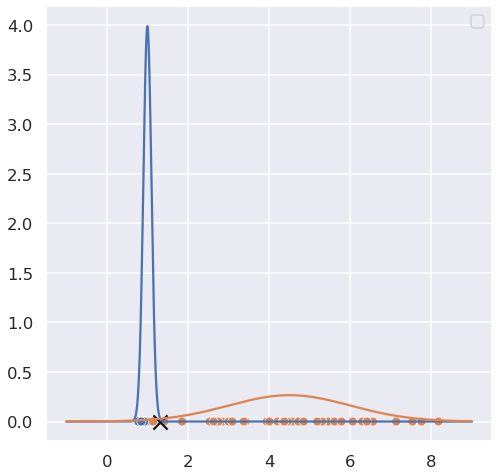

In [12]:
sns.scatterplot(x=data1D, y=[0]*data1D.shape[0], hue=labels)

x = np.linspace(-1, 9, 1000)
plt.plot(x, stats.norm.pdf(x, means[0], scale[0]))
plt.plot(x, stats.norm.pdf(x, means[1], scale[1]))

plt.scatter([1.315], [0], color="k", marker="x", s=200)

plt.legend("")
plt.show()

### Question: In which cluster should we place the red point ?

Let's zoom in, and compute the likelihoods. __Can we really conclude that the point is in the blue cluster?__

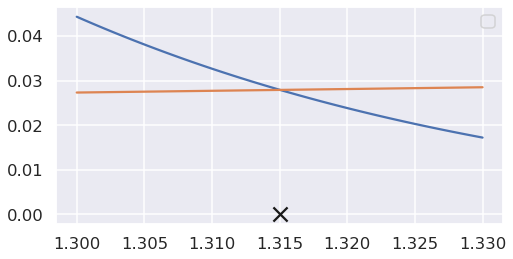

In [13]:
x = np.linspace(1.3, 1.33, 100)
plt.figure(figsize=(8, 4))
plt.plot(x, stats.norm.pdf(x, means[0], scale[0]))
plt.plot(x, stats.norm.pdf(x, means[1], scale[1]))

plt.scatter([1.315], [0], color="k", marker="x", s=200)

plt.legend("")
plt.show()

In [14]:
p_x_blue = stats.norm.pdf(1.315, means[0], scale[0])
p_x_orange = stats.norm.pdf(1.315, means[1], scale[1])

print(p_x_blue, p_x_orange)

0.02794258414879452 0.027912633932334185


### Gaussian Mixture Model algorithm

- If we know the correct parameters of the clusters (mean and variance): we can compute the probability that a point $x$ belongs to a cluster $C_k$
    - Likelihood: 
    $$p(x|C_k) = \frac{1}{\sqrt{2\pi\sigma_k^2}} \exp \left(\frac{||x - \mu_k||^2}{2\sigma_k^2}\right)$$
    - Probability: 
    $$p(C_k|x) = \frac{p(x|C_k)}{\sum_j p(x|C_j)}$$

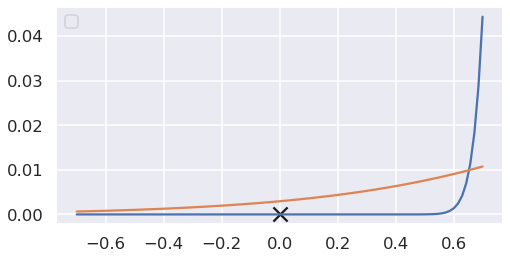

P blue   =  2.6043079246504417e-19
P orange =  1.0
Sum      =  1.0


In [15]:
x = np.linspace(-0.7, 0.7, 100)

plt.figure(figsize=(8, 4))

plt.plot(x, stats.norm.pdf(x, means[0], scale[0]))
plt.plot(x, stats.norm.pdf(x, means[1], scale[1]))

plt.scatter([0], [0], color="k", marker="x", s=200)

plt.legend("")
plt.show()

p_x_blue = stats.norm.pdf(0, means[0], scale[0])
p_x_orange = stats.norm.pdf(0, means[1], scale[1])

p_blue_x = p_x_blue / (p_x_blue + p_x_orange)
p_orange_x = p_x_orange / (p_x_blue + p_x_orange)

print("P blue   = ", p_blue_x)
print("P orange = ", p_orange_x)
print("Sum      = ", p_blue_x + p_orange_x)

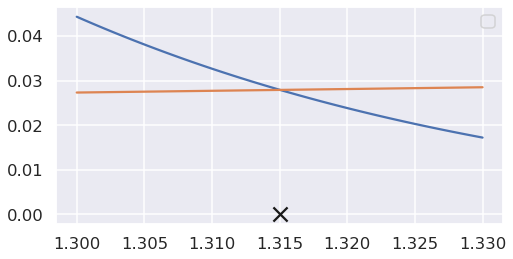

P blue   =  0.5002681058054131
P orange =  0.49973189419458686
Sum      =  1.0


In [16]:
x = np.linspace(1.3, 1.33, 100)
plt.figure(figsize=(8, 4))
plt.plot(x, stats.norm.pdf(x, means[0], scale[0]))
plt.plot(x, stats.norm.pdf(x, means[1], scale[1]))

plt.scatter([1.315], [0], color="k", marker="x", s=200)

plt.legend("")
plt.show()

p_x_blue = stats.norm.pdf(1.315, means[0], scale[0])
p_x_orange = stats.norm.pdf(1.315, means[1], scale[1])

p_blue_x = p_x_blue / (p_x_blue + p_x_orange)
p_orange_x = p_x_orange / (p_x_blue + p_x_orange)

print("P blue   = ", p_blue_x)
print("P orange = ", p_orange_x)
print("Sum      = ", p_blue_x + p_orange_x)

### Gaussian Mixture Model algorithm

- If we know the correct parameters of the clusters (mean and variance): we can compute the probability that a point $x$ belongs to a cluster $C_k$
    - Likelihood: 
    $$p(x|C_k) = \frac{1}{\sqrt{2\pi\sigma_k^2}} \exp \left(\frac{||x - \mu_k||^2}{2\sigma_k^2}\right)$$
    - Probability: 
    $$p(C_k|x) = \frac{p(x|C_k)}{\sum_j p(x|C_j)}$$
    
#### How do we find these parameters ?

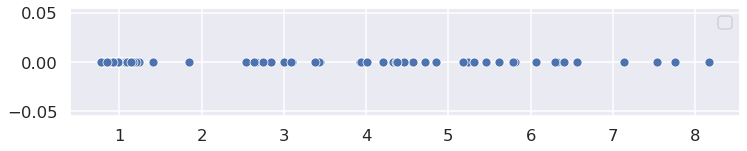

In [17]:
plt.figure(figsize=(12, 2));sns.scatterplot(x=data1D, y=[0]*data1D.shape[0]);plt.legend("");plt.show()

### Gaussian Mixture Model algorithm

- If we know the correct parameters of the clusters (mean and variance): we can compute the probability that a point $x$ belongs to a cluster $C_k$
    - Likelihood: 
    $$p(x|C_k) = \frac{1}{\sqrt{2\pi\sigma_k^2}} \exp \left(\frac{||x - \mu_k||^2}{2\sigma_k^2}\right)$$
    - Probability: 
    $$p(C_k|x) = \frac{p(x|C_k)}{\sum_j p(x|C_j)}$$
    
#### If we knew the correct cluster assignements for the points, would we be able to compute the Gaussian parameters?

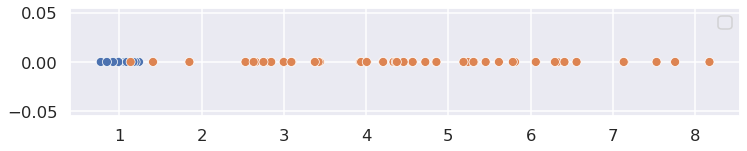

In [18]:
plt.figure(figsize=(12, 2));sns.scatterplot(x=data1D, y=[0]*data1D.shape[0], hue=labels);plt.legend("");plt.show()

### Gaussian Mixture Model algorithm

- If we know the correct parameters of the clusters (mean and variance): we can compute the probability that a point $x$ belongs to a cluster $C_k$
    - Likelihood: 
    $$p(x|C_k) = \frac{1}{\sqrt{2\pi\sigma_k^2}} \exp \left(\frac{||x - \mu_k||^2}{2\sigma_k^2}\right)$$
    - Probability: 
    $$p(C_k|x) = \frac{p(x|C_k)}{\sum_j p(x|C_j)}$$
    
- If we know the correct cluster assignements of the points we can compute the mean and variance of the Multi-Variate Gaussians
    - Mean:
    $$\mu_k = \frac{\sum_i p(C_k|x_i).x_i}{\sum_i p(C_k|x_i)}$$
    - Variance:
    $$\sigma_k^2 = \frac{\sum_i p(C_k|x_i).(x_i-\mu_k)^2}{\sum_i p(C_k|x_i)}$$

### Gaussian Mixture Model algorithm

- If we know the correct parameters of the clusters (mean and variance): we can compute the probability that a point $x$ belongs to a cluster $C_k$
    
- If we know the correct cluster assignements of the points we can compute the mean and variance of the Multi-Variate Gaussians

__Does it ring a bell?__

__How can we compute the means and variances ?__

### The Expectation Maximization Algorithm for 1D GMM

- Fix K, the desired number of clusters
- Initialize the K means and variances at random
- Repeat:
    - Compute the soft allocations of data points under current parameters of the Gaussians
    - Update the parameters using the new soft allocation values
- Stop when the total likelihood is not changing anymore

__Exercise:__ Try to implement EM to fit a GMM to the 1D toy example

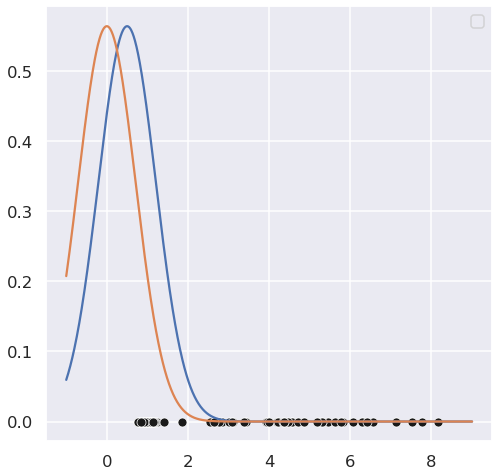

In [19]:
# Initialization

means = [0.5, 0]
stds = [np.sqrt(0.5), np.sqrt(0.5)]

sns.scatterplot(x=data1D, y=[0]*data1D.shape[0], color="k")
x = np.linspace(-1, 9, 1000)
plt.plot(x, stats.norm.pdf(x, means[0], stds[0]))
plt.plot(x, stats.norm.pdf(x, means[1], stds[1]))

plt.legend("")
plt.show()

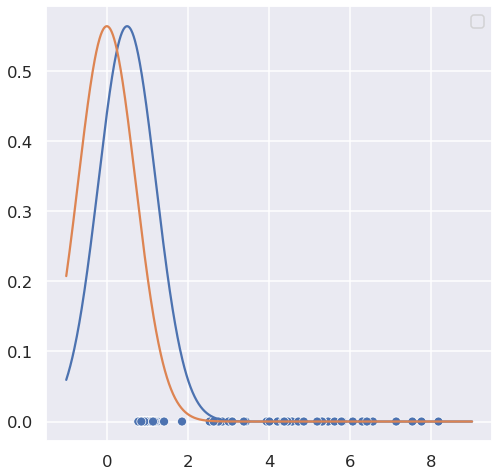

Total likelihood =  22.718257386171505


In [20]:
# Allocation update

p_x_Ck = [stats.norm.pdf(data1D, means[k], stds[k]) for k in range(2)]

p_Ck_x = [p_x_Ck[k] / np.sum(p_x_Ck, axis=0) for k in range(2)]
          
labels = [np.argmax([p_Ck_x[0][i], p_Ck_x[1][i]]) for i in range(len(p_Ck_x[1]))]

sns.scatterplot(x=data1D, y=[0]*data1D.shape[0], hue=labels)
x = np.linspace(-1, 9, 1000)
plt.plot(x, stats.norm.pdf(x, means[0], stds[0]))
plt.plot(x, stats.norm.pdf(x, means[1], stds[1]))

plt.legend("")
plt.show()

print("Total likelihood = ", np.sum([np.max([p_x_Ck[0][i], p_x_Ck[1][i]]) for i in range(len(p_x_Ck[1]))]))

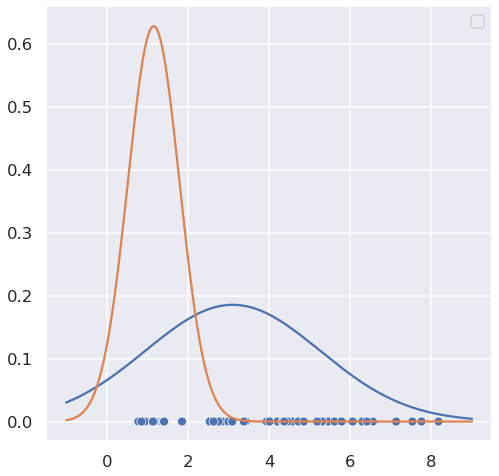

In [21]:
# Parameters update

means = [np.sum(p_Ck_x[k]*data1D) / np.sum(p_Ck_x[k]) for k in range(2)]
stds = [np.sqrt(np.sum(p_Ck_x[k]*(data1D - means[k])**2) / np.sum(p_Ck_x[k])) for k in range(2)]

sns.scatterplot(x=data1D, y=[0]*data1D.shape[0], hue=labels)
x = np.linspace(-1, 9, 1000)
plt.plot(x, stats.norm.pdf(x, means[0], stds[0]))
plt.plot(x, stats.norm.pdf(x, means[1], stds[1]))

plt.legend("")
plt.show()

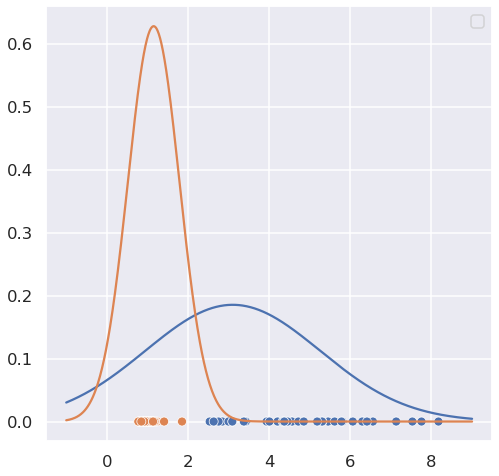

Total likelihood =  37.59071724099201


In [22]:
# Allocation update

p_x_Ck = [stats.norm.pdf(data1D, means[k], stds[k]) for k in range(2)]

p_Ck_x = [p_x_Ck[k] / np.sum(p_x_Ck, axis=0) for k in range(2)]
          
labels = [np.argmax([p_Ck_x[0][i], p_Ck_x[1][i]]) for i in range(len(p_Ck_x[1]))]

sns.scatterplot(x=data1D, y=[0]*data1D.shape[0], hue=labels)
x = np.linspace(-1, 9, 1000)
plt.plot(x, stats.norm.pdf(x, means[0], stds[0]))
plt.plot(x, stats.norm.pdf(x, means[1], stds[1]))

plt.legend("")
plt.show()

print("Total likelihood = ", np.sum([np.max([p_x_Ck[0][i], p_x_Ck[1][i]]) for i in range(len(p_x_Ck[1]))]))

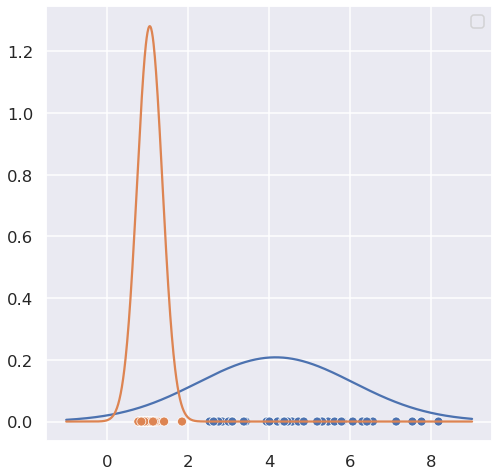

In [23]:
# Parameters update

means = [np.sum(p_Ck_x[k]*data1D) / np.sum(p_Ck_x[k]) for k in range(2)]
stds = [np.sqrt(np.sum(p_Ck_x[k]*(data1D - means[k])**2) / np.sum(p_Ck_x[k])) for k in range(2)]

sns.scatterplot(x=data1D, y=[0]*data1D.shape[0], hue=labels)
x = np.linspace(-1, 9, 1000)
plt.plot(x, stats.norm.pdf(x, means[0], stds[0]))
plt.plot(x, stats.norm.pdf(x, means[1], stds[1]))

plt.legend("")
plt.show()

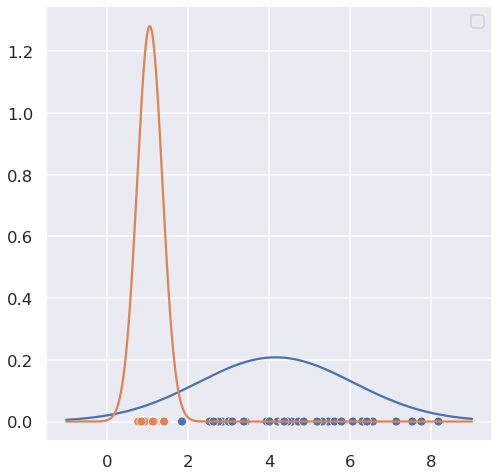

Total likelihood =  68.54333949493754


In [24]:
# Allocation update

p_x_Ck = [stats.norm.pdf(data1D, means[k], stds[k]) for k in range(2)]

p_Ck_x = [p_x_Ck[k] / np.sum(p_x_Ck, axis=0) for k in range(2)]
          
labels = [np.argmax([p_Ck_x[0][i], p_Ck_x[1][i]]) for i in range(len(p_Ck_x[1]))]

sns.scatterplot(x=data1D, y=[0]*data1D.shape[0], hue=labels)
x = np.linspace(-1, 9, 1000)
plt.plot(x, stats.norm.pdf(x, means[0], stds[0]))
plt.plot(x, stats.norm.pdf(x, means[1], stds[1]))

plt.legend("")
plt.show()

print("Total likelihood = ", np.sum([np.max([p_x_Ck[0][i], p_x_Ck[1][i]]) for i in range(len(p_x_Ck[1]))]))

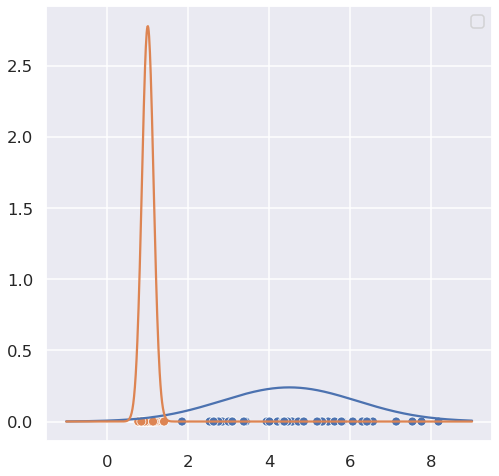

In [25]:
# Parameters update

means = [np.sum(p_Ck_x[k]*data1D) / np.sum(p_Ck_x[k]) for k in range(2)]
stds = [np.sqrt(np.sum(p_Ck_x[k]*(data1D - means[k])**2) / np.sum(p_Ck_x[k])) for k in range(2)]

sns.scatterplot(x=data1D, y=[0]*data1D.shape[0], hue=labels)
x = np.linspace(-1, 9, 1000)
plt.plot(x, stats.norm.pdf(x, means[0], stds[0]))
plt.plot(x, stats.norm.pdf(x, means[1], stds[1]))

plt.legend("")
plt.show()

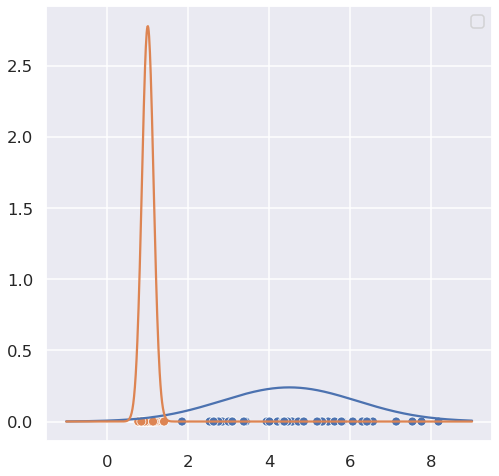

Total likelihood =  117.04968294290127


In [26]:
# Allocation update

p_x_Ck = [stats.norm.pdf(data1D, means[k], stds[k]) for k in range(2)]

p_Ck_x = [p_x_Ck[k] / np.sum(p_x_Ck, axis=0) for k in range(2)]
          
labels = [np.argmax([p_Ck_x[0][i], p_Ck_x[1][i]]) for i in range(len(p_Ck_x[1]))]

sns.scatterplot(x=data1D, y=[0]*data1D.shape[0], hue=labels)
x = np.linspace(-1, 9, 1000)
plt.plot(x, stats.norm.pdf(x, means[0], stds[0]))
plt.plot(x, stats.norm.pdf(x, means[1], stds[1]))

plt.legend("")
plt.show()

print("Total likelihood = ", np.sum([np.max([p_x_Ck[0][i], p_x_Ck[1][i]]) for i in range(len(p_x_Ck[1]))]))

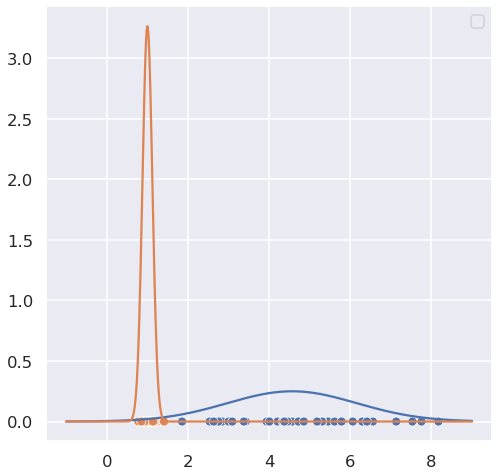

In [27]:
# Parameters update

means = [np.sum(p_Ck_x[k]*data1D) / np.sum(p_Ck_x[k]) for k in range(2)]
stds = [np.sqrt(np.sum(p_Ck_x[k]*(data1D - means[k])**2) / np.sum(p_Ck_x[k])) for k in range(2)]

sns.scatterplot(x=data1D, y=[0]*data1D.shape[0], hue=labels)
x = np.linspace(-1, 9, 1000)
plt.plot(x, stats.norm.pdf(x, means[0], stds[0]))
plt.plot(x, stats.norm.pdf(x, means[1], stds[1]))

plt.legend("")
plt.show()

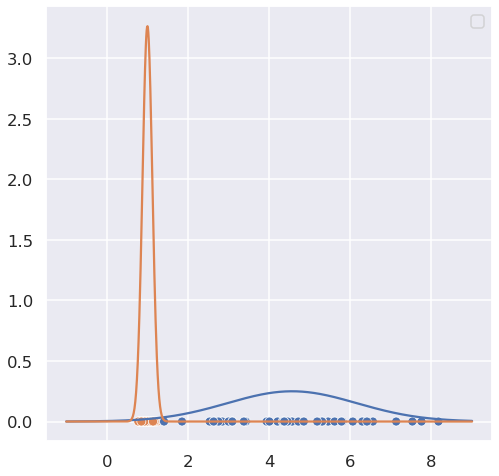

Total likelihood =  127.08158935154796


In [28]:
# Allocation update

p_x_Ck = [stats.norm.pdf(data1D, means[k], stds[k]) for k in range(2)]

p_Ck_x = [p_x_Ck[k] / np.sum(p_x_Ck, axis=0) for k in range(2)]
          
labels = [np.argmax([p_Ck_x[0][i], p_Ck_x[1][i]]) for i in range(len(p_Ck_x[1]))]

sns.scatterplot(x=data1D, y=[0]*data1D.shape[0], hue=labels)
x = np.linspace(-1, 9, 1000)
plt.plot(x, stats.norm.pdf(x, means[0], stds[0]))
plt.plot(x, stats.norm.pdf(x, means[1], stds[1]))

plt.legend("")
plt.show()

print("Total likelihood = ", np.sum([np.max([p_x_Ck[0][i], p_x_Ck[1][i]]) for i in range(len(p_x_Ck[1]))]))

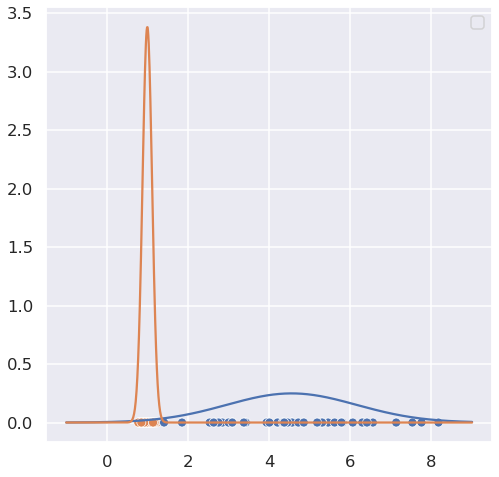

In [29]:
# Parameters update

means = [np.sum(p_Ck_x[k]*data1D) / np.sum(p_Ck_x[k]) for k in range(2)]
stds = [np.sqrt(np.sum(p_Ck_x[k]*(data1D - means[k])**2) / np.sum(p_Ck_x[k])) for k in range(2)]

sns.scatterplot(x=data1D, y=[0]*data1D.shape[0], hue=labels)
x = np.linspace(-1, 9, 1000)
plt.plot(x, stats.norm.pdf(x, means[0], stds[0]))
plt.plot(x, stats.norm.pdf(x, means[1], stds[1]))

plt.legend("")
plt.show()

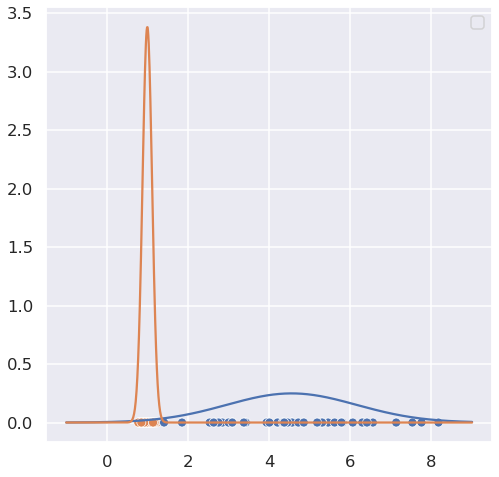

Total likelihood =  129.02895838421477


In [30]:
# Allocation update

p_x_Ck = [stats.norm.pdf(data1D, means[k], stds[k]) for k in range(2)]

p_Ck_x = [p_x_Ck[k] / np.sum(p_x_Ck, axis=0) for k in range(2)]
          
labels = [np.argmax([p_Ck_x[0][i], p_Ck_x[1][i]]) for i in range(len(p_Ck_x[1]))]

sns.scatterplot(x=data1D, y=[0]*data1D.shape[0], hue=labels)
x = np.linspace(-1, 9, 1000)
plt.plot(x, stats.norm.pdf(x, means[0], stds[0]))
plt.plot(x, stats.norm.pdf(x, means[1], stds[1]))

plt.legend("")
plt.show()

print("Total likelihood = ", np.sum([np.max([p_x_Ck[0][i], p_x_Ck[1][i]]) for i in range(len(p_x_Ck[1]))]))

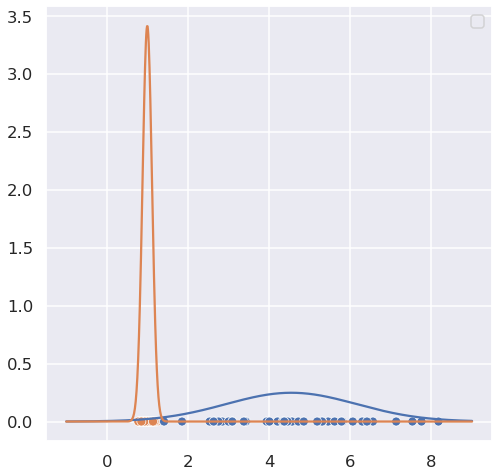

In [31]:
# Parameters update

means = [np.sum(p_Ck_x[k]*data1D) / np.sum(p_Ck_x[k]) for k in range(2)]
stds = [np.sqrt(np.sum(p_Ck_x[k]*(data1D - means[k])**2) / np.sum(p_Ck_x[k])) for k in range(2)]

sns.scatterplot(x=data1D, y=[0]*data1D.shape[0], hue=labels)
x = np.linspace(-1, 9, 1000)
plt.plot(x, stats.norm.pdf(x, means[0], stds[0]))
plt.plot(x, stats.norm.pdf(x, means[1], stds[1]))

plt.legend("")
plt.show()

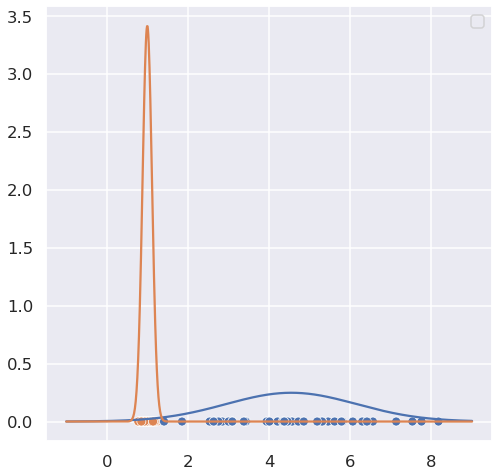

Total likelihood =  129.53169645197832


In [32]:
# Allocation update

p_x_Ck = [stats.norm.pdf(data1D, means[k], stds[k]) for k in range(2)]

p_Ck_x = [p_x_Ck[k] / np.sum(p_x_Ck, axis=0) for k in range(2)]
          
labels = [np.argmax([p_Ck_x[0][i], p_Ck_x[1][i]]) for i in range(len(p_Ck_x[1]))]

sns.scatterplot(x=data1D, y=[0]*data1D.shape[0], hue=labels)
x = np.linspace(-1, 9, 1000)
plt.plot(x, stats.norm.pdf(x, means[0], stds[0]))
plt.plot(x, stats.norm.pdf(x, means[1], stds[1]))

plt.legend("")
plt.show()

print("Total likelihood = ", np.sum([np.max([p_x_Ck[0][i], p_x_Ck[1][i]]) for i in range(len(p_x_Ck[1]))]))

## Extension to multi-dimensional data

- The mean value becomes a mean vector
- The variance becomes a covariance matrix

The principle remains the same: EM-algorithm

- Use current estimate of the parameters to allocate soft clusters to the data points
- Use the soft allocations to compute the new estimates for the parameters
- Stop when the total likelihood stops changing

### Exercise: Understanding covariance matrices

Play with the parameters of a covariance matrix to understand what they represent

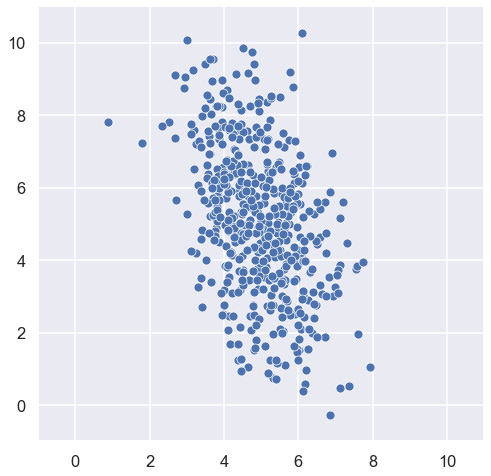

In [8]:
mean = np.array([5, 5])
cov = np.array([[1, -1], [-1, 5]])
                
n_points = 500

data_test_cov = np.random.multivariate_normal(mean=mean, cov=cov, size=n_points)

sns.scatterplot(x=data_test_cov[:, 0], y=data_test_cov[:,1])
plt.axis([-1, 11, -1, 11])
plt.show()

## GMM using sklearn

__Exercise:__ Solve the initial example problem using GMM.

- from sklearn.mixture import GaussianMixture
- GaussianMixture(n_components=2)

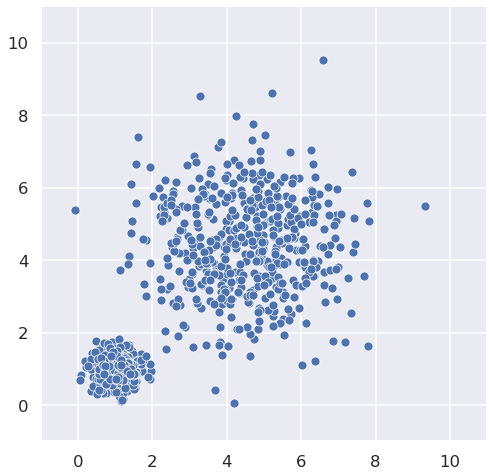

In [34]:
means = [np.array([1, 1]), np.array([4.5, 4.5])]
covariance = [np.array([[0.1, 0], [0, 0.1]]), np.array([[2, 0], [0, 2]])]
n_points = 500

data = [np.random.multivariate_normal(mean=means[i], cov=covariance[i], size=n_points) for i in range(2)]
data = np.r_[data[0], data[1]]

sns.scatterplot(x=data[:, 0], y=data[:,1])
plt.axis([-1, 11, -1, 11])
plt.show()

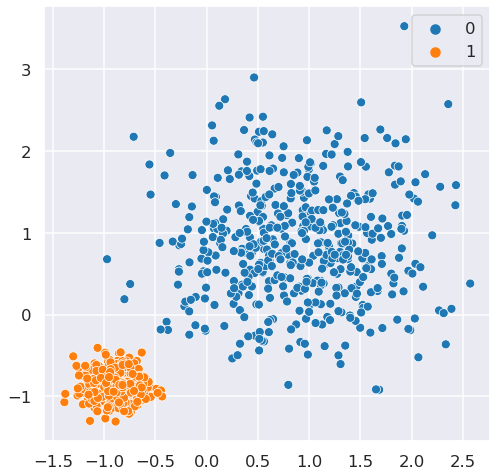

In [35]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=2)
clusters = gm.fit_predict(data_scaled)

sns.scatterplot(x=data_scaled[:, 0], y=data_scaled[:,1], hue=clusters, palette="tab10")
plt.show()

## GMM using sklearn

__Exercise:__ What is the probability of the point $[-0.5, -0.5]$ to be in the blue cluster? The orange?

- gm.predict_proba

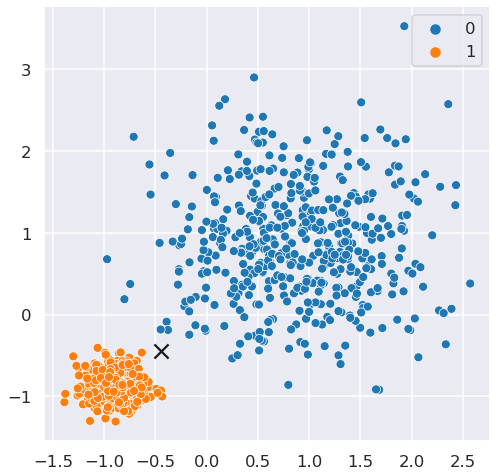

In [36]:
new_point = np.array([-0.45, -0.45])

sns.scatterplot(x=data_scaled[:, 0], y=data_scaled[:,1], hue=clusters, palette="tab10")
plt.scatter(new_point[0], new_point[1], color="k", marker="x", s=200)
plt.show()

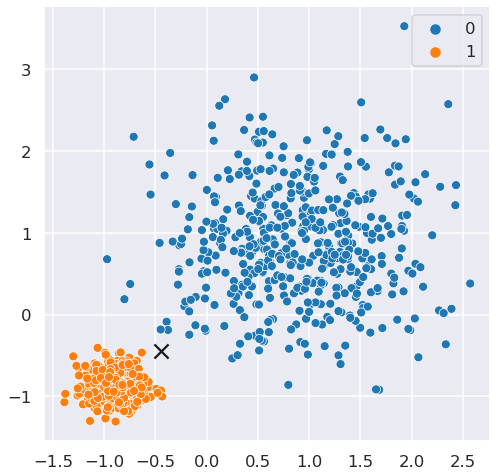

Proba new point in blue cluster   =  0.7471940498379013
Proba new point in orange cluster =  0.2528059501620987


In [37]:
sns.scatterplot(x=data_scaled[:, 0], y=data_scaled[:,1], hue=clusters, palette="tab10")
plt.scatter(new_point[0], new_point[1], color="k", marker="x", s=200)
plt.show()

probas = gm.predict_proba(new_point.reshape(1, -1))

print("Proba new point in blue cluster   = ", probas[0][0])
print("Proba new point in orange cluster = ", probas[0][1])

## Constraints on the covariance matrices

- How many parameters do we need to estimate for a GMM with $K$ components on data in dimension $N$?

## Constraints on the covariance matrices

- How many parameters do we need to estimate for a GMM with $K$ components on data in dimension $N$?

$$n_{params} = K \frac{N^2 + N}{2}$$

## Constraints on the covariance matrices

To reduce this number of parameters, we can place constraints on the Covariance matrices

- No constraint: _covariance_type="full"_
$$n_{params} = K \frac{N^2 + N}{2}$$

- Force all components to share same covariance matrix: _covariance_type="tied"_
$$n_{params} = \;\; ?$$

## Constraints on the covariance matrices

To reduce this number of parameters, we can place constraints on the Covariance matrices

- No constraint: _covariance_type="full"_
$$n_{params} = K \frac{N^2 + 3N}{2}$$

- Force all components to share same covariance matrix: _covariance_type="tied"_
$$n_{params} = \frac{N^2 + 3N}{2}$$

- Force diagonal covariance matrices: _covariance_type="diag"_
$$n_{params} = \;\; ?$$

## Constraints on the covariance matrices

To reduce this number of parameters, we can place constraints on the Covariance matrices

- No constraint: _covariance_type="full"_
$$n_{params} = K \frac{N^2 + 3N}{2}$$

- Force all components to share same covariance matrix: _covariance_type="tied"_
$$n_{params} = \frac{N^2 + 3N}{2}$$

- Force diagonal covariance matrices: _covariance_type="diag"_
$$n_{params} = 2KN$$

- Force covariance matrix to be diagonal, all dimensions with equal variance: _covariance_type="spherical"_
$$n_{params} = \;\; ?$$

## Constraints on the covariance matrices

To reduce this number of parameters, we can place constraints on the Covariance matrices

- No constraint: _covariance_type="full"_

$$n_{params} = K \frac{N^2 + 3N}{2}$$


- Force all components to share same covariance matrix: _covariance_type="tied"_

$$n_{params} = \frac{N^2 + 3N}{2}$$


- Force diagonal covariance matrices: _covariance_type="diag"_

$$n_{params} = 2KN$$


- Force covariance matrix to be diagonal, all dimensions with equal variance: _covariance_type="spherical"_

$$n_{params} = \;\; K(N+1)$$

## Constraints on the covariance matrices

__Example 1:__ Can we use _diag_?, _tied_? _spherical_?

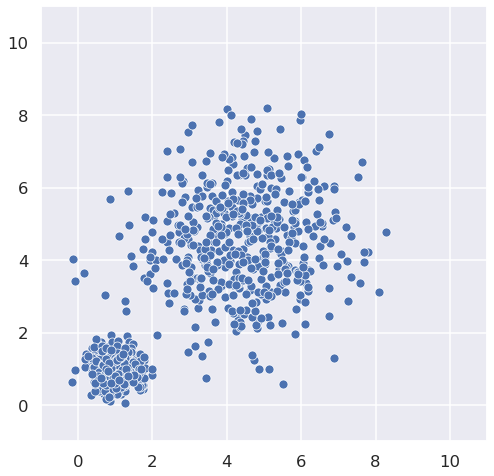

In [38]:
means = [np.array([1, 1]), np.array([4.5, 4.5])]
covariance = [np.array([[0.1, 0], [0, 0.1]]), np.array([[2, 0], [0, 2]])]
n_points = 500

data = [np.random.multivariate_normal(mean=means[i], cov=covariance[i], size=n_points) for i in range(2)]
data = np.r_[data[0], data[1]]

sns.scatterplot(x=data[:, 0], y=data[:,1])
plt.axis([-1, 11, -1, 11])
plt.show()

## Constraints on the covariance matrices

__Example :__ Can we use _diag_?

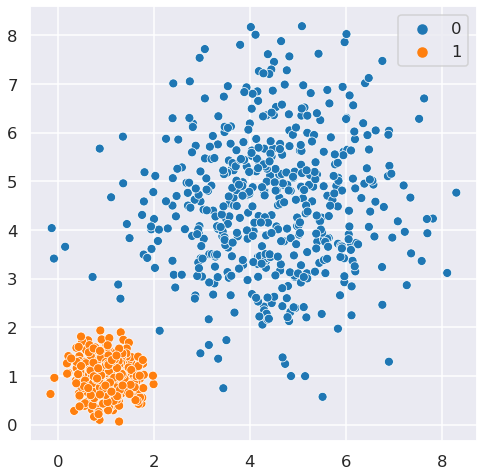

In [39]:
gm = GaussianMixture(n_components=2, covariance_type="diag")
clusters = gm.fit_predict(data)

sns.scatterplot(x=data[:, 0], y=data[:,1], hue=clusters, palette="tab10")
plt.show()

## Constraints on the covariance matrices

__Example 2:__ Can we use _tied_?

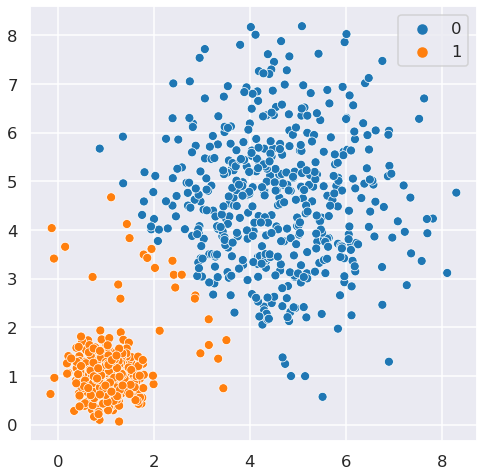

In [40]:
gm = GaussianMixture(n_components=2, covariance_type="tied")
clusters = gm.fit_predict(data)

sns.scatterplot(x=data[:, 0], y=data[:,1], hue=clusters, palette="tab10")
plt.show()

## Constraints on the covariance matrices

__Example 2:__ Can we use _spherical_?

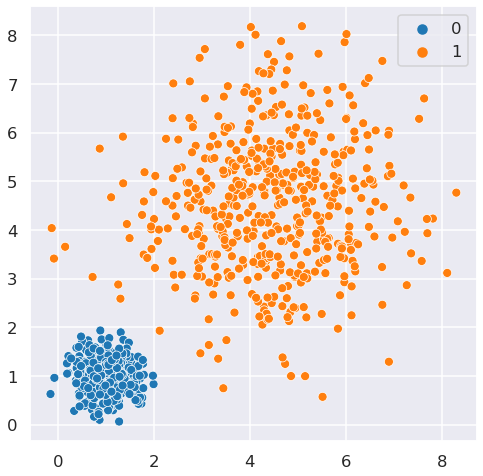

In [41]:
gm = GaussianMixture(n_components=2, covariance_type="spherical")
clusters = gm.fit_predict(data)

sns.scatterplot(x=data[:, 0], y=data[:,1], hue=clusters, palette="tab10")
plt.show()

## Constraints on the covariance matrices

__Example 2:__ Can we use _diag_?, _tied_? _spherical_?

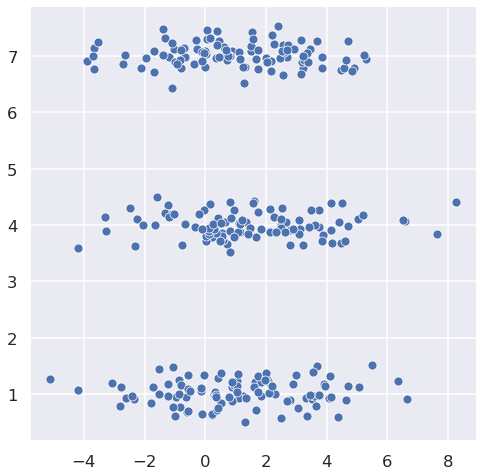

In [42]:
means = [np.array([1, 1]), np.array([1, 4]), np.array([1, 7])]
covariance = np.array([[5, 0], [0, 0.05]])
n_points = 100

data = [np.random.multivariate_normal(mean=means[i], cov=covariance, size=n_points) for i in range(3)]
all_data = np.r_[data[0], data[1], data[2]]

sns.scatterplot(x=all_data[:, 0], y=all_data[:,1])
plt.show()

## Constraints on the covariance matrices

__Example 2:__ Can we use _diag_?

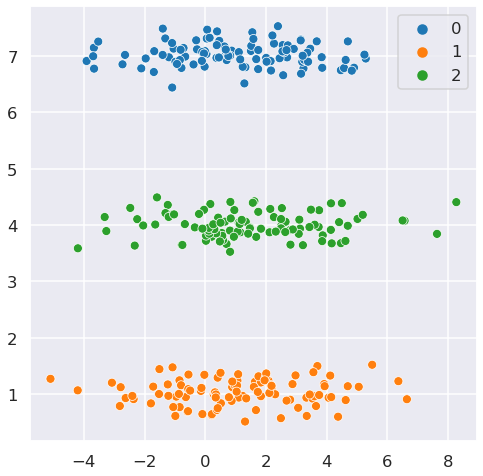

In [43]:
gm = GaussianMixture(n_components=3, covariance_type="diag", n_init=50)
clusters = gm.fit_predict(all_data)

sns.scatterplot(x=all_data[:, 0], y=all_data[:,1], hue=clusters, palette="tab10")
plt.show()

## Constraints on the covariance matrices

__Example 2:__ Can we use _tied_?

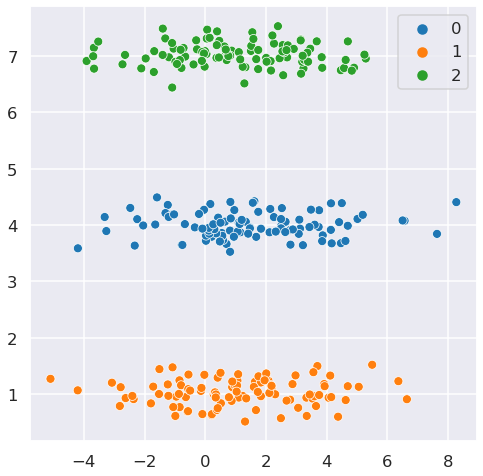

In [44]:
gm = GaussianMixture(n_components=3, covariance_type="tied", n_init=50)
clusters = gm.fit_predict(all_data)

sns.scatterplot(x=all_data[:, 0], y=all_data[:,1], hue=clusters, palette="tab10")
plt.show()

## Constraints on the covariance matrices

__Example 2:__ Can we use _spherical_?

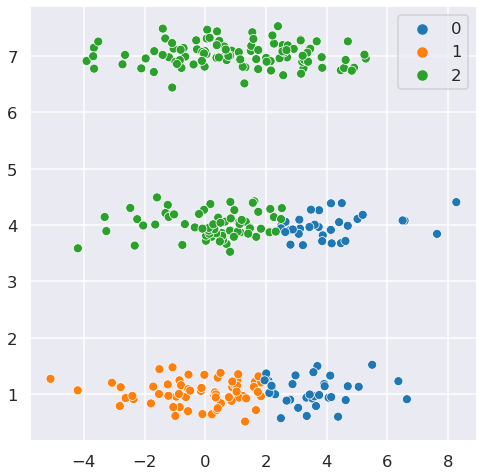

In [45]:
gm = GaussianMixture(n_components=3, covariance_type="spherical", n_init=50)
clusters = gm.fit_predict(all_data)

sns.scatterplot(x=all_data[:, 0], y=all_data[:,1], hue=clusters, palette="tab10")
plt.show()

## Selecting covariance type / number of components

- Increasing the number of parameters (number of components/no constraints on covariance) generally results in a higher total likelihood.

- However, models that are too large are not very informative (e.g., each point its cluster)

- Hence, we want to find a good __balance__ between __number of parameters__ and __high total likelihood__.

### The BIC criterion

$$BIC = -2 \log(L) + \log(N)$$

$L$ total likelihood, $N$ number of parameters

## Selecting covariance type / number of components

__Example 1:__

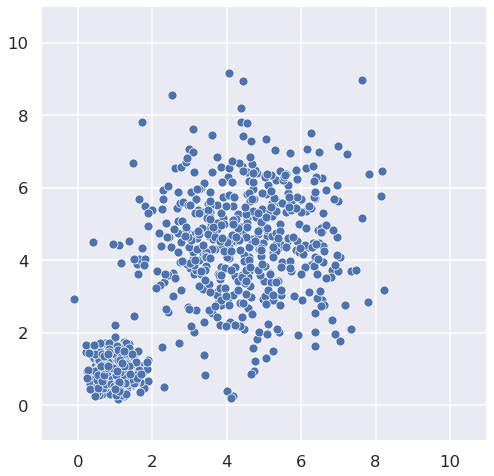

In [46]:
means = [np.array([1, 1]), np.array([4.5, 4.5])]
covariance = [np.array([[0.1, 0], [0, 0.1]]), np.array([[2, 0], [0, 2]])]
n_points = 500

data = [np.random.multivariate_normal(mean=means[i], cov=covariance[i], size=n_points) for i in range(2)]
data = np.r_[data[0], data[1]]

sns.scatterplot(x=data[:, 0], y=data[:,1])
plt.axis([-1, 11, -1, 11])
plt.show()

In [47]:
n_components_range = range(1, 5)
cv_types = ["spherical", "tied", "diag", "full"]

bic = []
names = []
for cv in cv_types:
    for n_comp in n_components_range:
        names.append(cv + "__" + str(n_comp))
        gmm = GaussianMixture(n_components=n_comp, covariance_type=cv)
        gmm.fit(data)
        bic.append(gmm.bic(data))

index = np.argmin(bic)
print(names[index], bic[index])

spherical__2 5552.145363481166


## Selecting covariance type / number of components

__Example 2:__

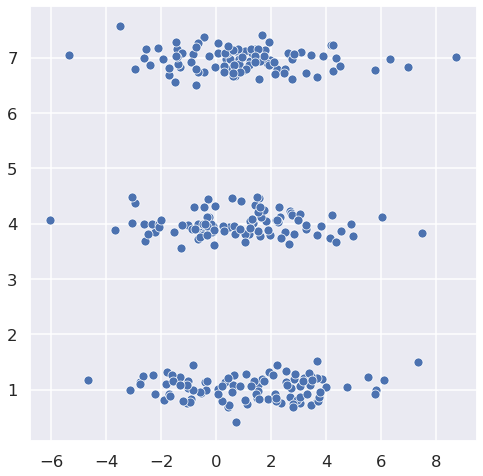

In [48]:
means = [np.array([1, 1]), np.array([1, 4]), np.array([1, 7])]
covariance = np.array([[5, 0], [0, 0.05]])
n_points = 100

data = [np.random.multivariate_normal(mean=means[i], cov=covariance, size=n_points) for i in range(3)]
all_data = np.r_[data[0], data[1], data[2]]

sns.scatterplot(x=all_data[:, 0], y=all_data[:,1])
plt.show()

In [49]:
n_components_range = range(1, 5)
cv_types = ["spherical", "tied", "diag", "full"]

bic = []
names = []
for cv in cv_types:
    for n_comp in n_components_range:
        names.append(cv + "__" + str(n_comp))
        gmm = GaussianMixture(n_components=n_comp, covariance_type=cv)
        gmm.fit(all_data)
        bic.append(gmm.bic(all_data))

index = np.argmin(bic)
print(names[index], bic[index])

tied__3 1952.703426775689
